In [8]:
# 필요한 라이브러리 설치 (처음 한 번만 실행)
!pip install numpy pandas matplotlib seaborn scipy scikit-learn statsmodels pingouin scikit_posthocs xgboost -q

print("라이브러리 설치 완료!")

라이브러리 설치 완료!


In [9]:
# 데이터 처리 및 분석
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 출력 설정
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 한글 폰트 설정
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# 시드 설정
np.random.seed(42) # 팀원간의 결과물이 동일하게 보일 수 있음

print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

라이브러리 로드 완료!
한글 폰트 설정 완료!


In [10]:
import os
os.chdir(r"C:\Users\lizzy\스파르타_파이썬\심화플젝")
print(os.getcwd())  # 잘 바뀌었는지 확인

C:\Users\lizzy\스파르타_파이썬\심화플젝


In [11]:
# 데이터 로드
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_product_translate = pd.read_csv('product_category_name_translation.csv')
df_products = pd.read_csv('olist_products_dataset.csv')

print("="*60)
print("데이터 로드 완료!")
print("="*60)
print(f"\ngeolocation: {df_geolocation.shape}")
print(f"order_items: {df_order_items.shape}")
print(f"order_items: {df_products.shape}")
print(f"order_reviews: {df_order_reviews.shape}")
print(f"orders: {df_orders.shape}")
print(f"customers: {df_customers.shape}")
print(f"order_payments: {df_order_payments.shape}")
print(f"sellers: {df_sellers.shape}")
print(f"products: {df_products.shape}")
print(f"product_translate: {df_product_translate.shape}")




데이터 로드 완료!

geolocation: (1000163, 5)
order_items: (112650, 7)
order_items: (32951, 9)
order_reviews: (99224, 7)
orders: (99441, 8)
customers: (99441, 5)
order_payments: (103886, 5)
sellers: (3095, 4)
products: (32951, 9)
product_translate: (71, 2)


#### 이상치 처리(df_order_payments_cleaned)

In [12]:
Q1 = df_order_payments['payment_value'].quantile(0.25)
Q3 = df_order_payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 하한선 또는 상한선으로 대체
df_order_payments_cleaned = df_order_payments[(df_order_payments['payment_value'] >= lower_bound) & (df_order_payments['payment_value'] <= upper_bound)]

In [13]:
df_order_payments.shape

(103886, 5)

In [14]:
df_order_payments_cleaned.shape

(95905, 5)

#### geo 데이터 중 중복 데이터 처리(df_geolocation_1)

In [15]:
print(df_geolocation.isna().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [16]:
# 전체 중복 행 개수 확인
print(df_geolocation.duplicated().sum())

# 중복된 행만 확인
df_geolocation[df_geolocation.duplicated()]


261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [17]:
# 중복 제거 (첫 번째 행만 남기고 나머지 제거)
df_geolocation_1 = df_geolocation.drop_duplicates()

# 리뷰 분석에서 결측치는 제거

In [18]:
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [19]:
# review_comment_title 또는 review_comment_message 중 하나라도 NaN이면 제거
df_order_reviews_clean = df_order_reviews.dropna(
    subset=['review_comment_title', 'review_comment_message'],
    how='any'   # 둘 중 하나라도 NaN이면 제거
).reset_index(drop=True)


In [20]:
df_order_payments_cleaned.to_csv("df_order_payments_cleaned.csv", index=False, encoding="utf-8-sig")
df_geolocation_1.to_csv("df_geolocation_1.csv", index=False, encoding="utf-8-sig")

In [21]:
# 필요한 라이브러리 임포트
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from tqdm import tqdm
import pandas as pd

# tqdm이 pandas의 apply와 함께 동작하도록 설정
tqdm.pandas()

# 1️⃣ 감정분석 모델 불러오기
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# 2️⃣ 파이프라인 생성
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# 3️⃣ 감정 레이블 매핑 함수 정의
def map_sentiment(label):
    """
    모델의 출력 라벨 (예: '1 star', '3 stars', '5 stars')을
    부정=0, 중립=1, 긍정=2 로 매핑
    """
    stars = int(label.split()[0])
    if stars <= 2:
        return 0  # 부정
    elif stars == 3:
        return 1  # 중립
    else:
        return 2  # 긍정

# 4️⃣ tqdm 진행률 표시 + 감정분석 수행 (결측치 대비)
df_order_reviews["sentiment_raw"] = df_order_reviews["review_comment_message"].progress_apply(
    lambda x: sentiment_pipeline(str(x))[0]["label"] if pd.notnull(x) else "3 stars"
)

# 5️⃣ 레이블 매핑
df_order_reviews["sentiment"] = df_order_reviews["sentiment_raw"].progress_apply(map_sentiment)

# 6️⃣ 결과 확인
df_order_reviews[["review_comment_message", "sentiment"]].head()


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Device set to use cpu
100%|████████████████████████████████████████████████████████████████████████| 99224/99224 [00:00<00:00, 962923.69it/s]


,review_comment_message,sentiment
0,NaN,1
1,NaN,1
2,NaN,1
3,Recebi bem antes do prazo estipulado.,1
4,Parabéns lojas lannister adorei comprar pela I...,2


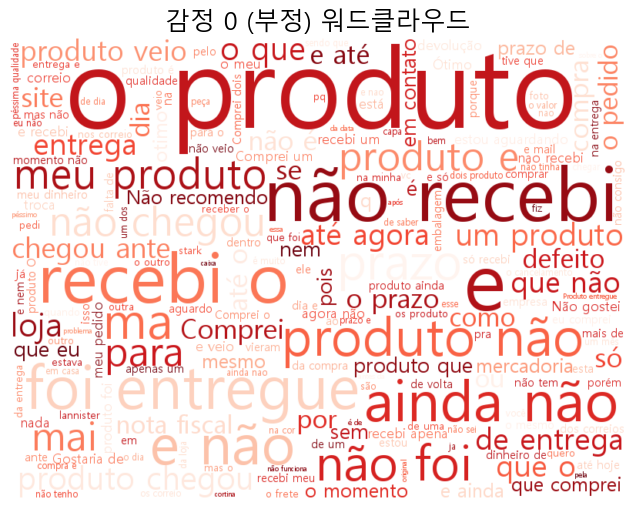

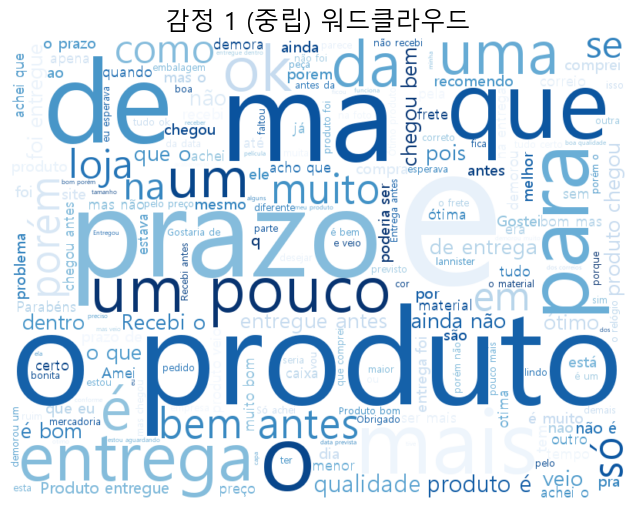

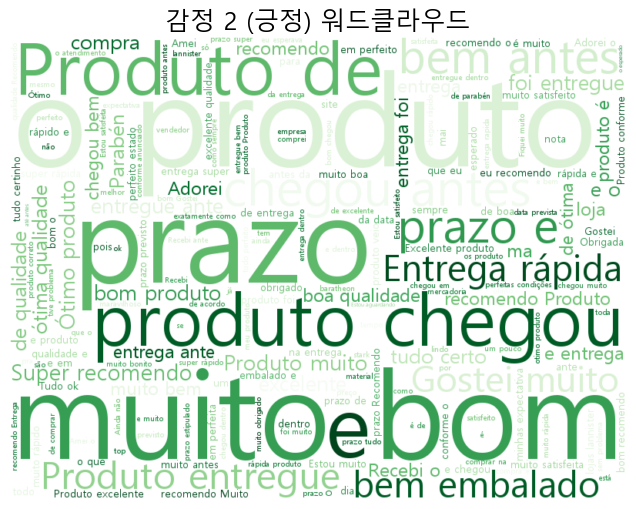

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 깨짐 방지용 폰트 (윈도우: 맑은고딕, 맥: AppleGothic)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우 기준
# font_path = "/System/Library/Fonts/AppleGothic.ttf"  # 맥이라면 이거로

# 감정별 텍스트 합치기
sentiment_texts = {
    0: " ".join(df_order_reviews.loc[df_order_reviews["sentiment"] == 0, "review_comment_message"].dropna().astype(str)),
    1: " ".join(df_order_reviews.loc[df_order_reviews["sentiment"] == 1, "review_comment_message"].dropna().astype(str)),
    2: " ".join(df_order_reviews.loc[df_order_reviews["sentiment"] == 2, "review_comment_message"].dropna().astype(str))
}

# 감정별 워드클라우드 색상 설정
colors = {0: "Reds", 1: "Blues", 2: "Greens"}

# 워드클라우드 생성 및 출력
for sentiment, text in sentiment_texts.items():
    plt.figure(figsize=(8, 6))
    wc = WordCloud(
        font_path=font_path,
        width=800,
        height=600,
        background_color="white",
        colormap=colors[sentiment],
        max_words=200
    ).generate(text)
    
    sentiment_name = {0: "부정", 1: "중립", 2: "긍정"}[sentiment]
    plt.title(f"감정 {sentiment} ({sentiment_name}) 워드클라우드", fontsize=18)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


![내 이미지](image%20\(1\).png)




![내 이미지](image%20\(2\).png)

![내 이미지](image%20\(3\).png)

In [ ]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tqdm.pandas()

# 번역 함수
def translate_to_en(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except:
        return text  # 번역 실패 시 원문 유지

# 영어로 번역된 컬럼 생성
df_order_reviews["review_comment_en"] = df_order_reviews["review_comment_message"].progress_apply(
    lambda x: translate_to_en(str(x)) if pd.notnull(x) else ""
)

# 감정별 텍스트 합치기
sentiment_texts = {
    0: " ".join(df_order_reviews.loc[df_order_reviews["sentiment"] == 0, "review_comment_en"].dropna()),
    1: " ".join(df_order_reviews.loc[df_order_reviews["sentiment"] == 1, "review_comment_en"].dropna()),
    2: " ".join(df_order_reviews.loc[df_order_reviews["sentiment"] == 2, "review_comment_en"].dropna())
}

# 워드클라우드 시각화
colors = {0: "Reds", 1: "Blues", 2: "Greens"}

for sentiment, text in sentiment_texts.items():
    plt.figure(figsize=(8, 6))
    wc = WordCloud(
        width=800,
        height=600,
        background_color="white",
        colormap=colors[sentiment],
        max_words=200
    ).generate(text)
    
    sentiment_name = {0: "Negative", 1: "Neutral", 2: "Positive"}[sentiment]
    plt.title(f"Sentiment {sentiment} ({sentiment_name}) WordCloud", fontsize=18)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


 69%|████████████████████████████████████████████████▉                      | 68411/99224 [38:01:55<3:46:58,  2.26it/s]

 69%|████████████████████████████████████████████████▉                      | 68423/99224 [38:01:58<2:15:50,  3.78it/s]